In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import itertools
#from pmdarima import auto_arima

In [2]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
# Pick one SKU
sku = df["SKU_ID"].unique()[0]

sku_df = df[df["SKU_ID"] == sku].sort_values("Date")

ts = sku_df.set_index("Date")["Units_Sold"]
ts = ts.asfreq("D")


In [4]:
split_days = 60

train = ts[:-split_days]
test = ts[-split_days:]

print("Train size:", len(train))
print("Test size:", len(test))


Train size: 305
Test size: 60


In [5]:
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)

pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

print("Searching best ARIMA order...")

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results

    except:
        continue

print(f"\nBest ARIMA order: {best_order} with AIC: {best_aic:.2f}")

Searching best ARIMA order...


c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi


Best ARIMA order: (2, 1, 3) with AIC: 2413.98


c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
forecast = best_model.forecast(steps=split_days)

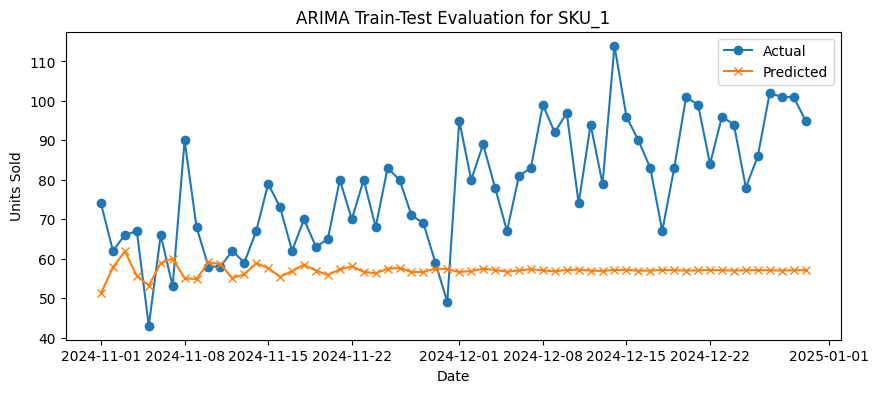

In [7]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test.values, label="Actual", marker="o")
plt.plot(test.index, forecast.values, label="Predicted", marker="x")
plt.legend()
plt.title(f"ARIMA Train-Test Evaluation for {sku}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

In [8]:
mae = np.mean(np.abs(test.values - forecast.values))
rmse = np.sqrt(np.mean((test.values - forecast.values)**2))

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

MAE  : 22.11
RMSE : 26.16


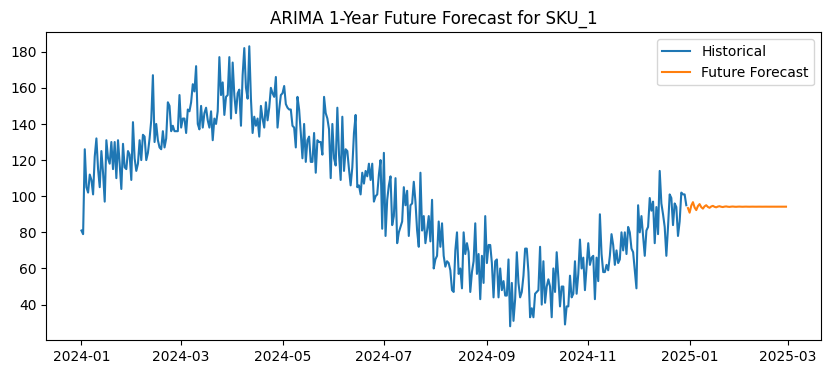

In [9]:
fit = ARIMA(ts, order=best_order).fit()

forecast_future = fit.forecast(steps=60)

future_dates = pd.date_range(
    start=ts.index.max() + pd.Timedelta(days=1),
    periods=60,
    freq="D"
)

plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values, label="Historical")
plt.plot(future_dates, forecast_future.values, label="Future Forecast")
plt.legend()
plt.title(f"ARIMA 1-Year Future Forecast for {sku}")
plt.show()
